# Análisis de señales con series de Fourier

Una serie de Fourier tiene la forma $$f(x) = \frac{a_0}{2} + \sum_{n =1}^\infty \left[a_n \cos\frac{2n\pi}{T}t + b_n \sin\frac{2n\pi}{T} t\right]$$

In [1]:
import numpy as np
import scipy.fftpack as fourier
import matplotlib.pyplot as plt

Una aplicación al procesamiento de imágenes: <https://www.unioviedo.es/compnum/laboratorios_py/Fourier/Fourier2D.html>

Requisitos de la transformada rápida de Fourier: el número de puntos en la serie debe ser una potencia de 2. La FFT es un algoritmo para calcular la transformada de Fourier discreta de una forma más eficiente. 

La transformada discreta de Fourier tiene la forma:
$$
A_k = \sum_{m=0}^{n-1}a_m\exp\left(-2\pi j\frac{mk}{n}\right)
$$
Donde $a_n$  son los coeficientes de la señal de entrada y $A_k$ los de la señal obtenida. Este será el espectro o transformada de $a_n$, que estarán en el dominio de la frecuencia, mientras que nuestra serie original está en el dominio del tiempo.

El siguiente es un ejemplo de la TDF para una señal sinusoidal.

In [2]:
def entradax(t,fs):
    x = np.cos(2*np.pi*fs*t)
    return(x)

In [3]:
t0 = 0
tn = 0.5 #float(input('rango segundos [0,tn]:'))
n = 1024 #int(input(' n muestras en rango:'))

In [4]:
dt=(tn-t0)/n    # intervalo de muestreo
# Analógica Referencia para mostrar que es par
fs=20
t = np.arange(-tn,tn,dt)  # eje tiempo analógica
m = len(t)
xanalog = np.zeros(m, dtype=float)
for i in range(0,m):
    xanalog[i]=entradax(t[i],fs)

In [5]:
# FFT: Transformada Rapida de Fourier
# Analiza la parte t>=0 de xnalog muestras[n:2*n]
xf = fourier.fft(xanalog[n:2*n])
xf = fourier.fftshift(xf)
# Rango de frecuencia para eje
frq = fourier.fftfreq(n, dt)
frq = fourier.fftshift(frq)

In [6]:
# x[w] real
xfreal=(1/n)*np.real(xf)
# x[w] imaginario
xfimag=(1/n)*np.imag(xf)
# x[w] magnitud
xfabs=(1/n)*np.abs(xf)
# x[w] angulo
xfangle=(1/n)*np.unwrap(np.angle(xf))

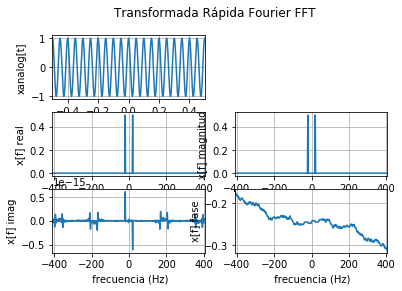

In [8]:
#SALIDA
plt.figure(1)       # define la grafica
plt.suptitle('Transformada Rápida Fourier FFT')

plt.subplot(321)    # grafica de 3x2, subgrafica 1
plt.ylabel('xanalog[t]')
plt.xlabel('tiempo')
plt.plot(t,xanalog)
plt.margins(0,0.05)
plt.grid()

ventana=0.2 # ventana de frecuencia a observar alrededor f=0
ra=int(len(frq)*(0.5-ventana))
rb=int(len(frq)*(0.5+ventana))
plt.subplot(323)    # grafica de 3x2, subgrafica 3
plt.ylabel('x[f] real')
plt.xlabel(' frecuencia (Hz)')
plt.plot(frq[ra:rb],xfreal[ra:rb])
plt.margins(0,0.05)
plt.grid()

plt.subplot(325)    # grafica de 3x2, subgrafica 5
plt.ylabel('x[f] imag')
plt.xlabel(' frecuencia (Hz)')
plt.plot(frq[ra:rb],xfimag[ra:rb])
plt.margins(0,0.05)
plt.grid()

plt.subplot(324)    # grafica de 3x2, subgrafica 4
plt.ylabel('x[f] magnitud')
plt.xlabel(' frecuencia (Hz)')
plt.plot(frq[ra:rb],xfabs[ra:rb])
plt.margins(0,0.05)
plt.grid()

plt.subplot(326)    # grafica de 3x2, subgrafica 6
plt.ylabel('x[f] fase')
plt.xlabel(' frecuencia (Hz)')
plt.plot(frq[ra:rb],xfangle[ra:rb])
plt.margins(0,0.05)
plt.grid()

plt.show()


## ¿Qué sigue?
Obtener las series que nos representan a cada uno de los vehículos.
Investigar técnicas para datos faltantes.